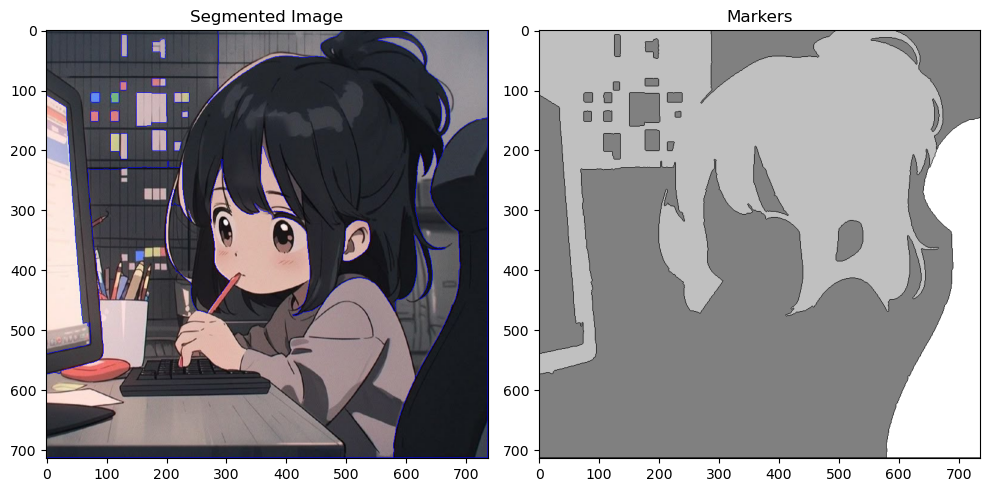

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = r"C:\Users\shari\Downloads\g.jpg"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0] 

plt.figure(figsize=(10, 5))

plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),
plt.title('Segmented Image')
plt.subplot(122), plt.imshow(markers, cmap='gray'), plt.title('Markers')
plt.tight_layout()
plt.show()